In [63]:
FileLabelName = '../../../Data/Dog/labels_1.csv'
FileImageName = '../../../Data/Dog/train/'
import zipfile

# z = zipfile.ZipFile(FileLabelName, 'r') # 这里的第二个参数用r表示是读取zip文件，w是创建一个zip文件

# for f in z.namelist():
#     bytes = z.read(f)

In [68]:
DEBUG = False
Size = 32

In [69]:
import pandas as pd
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.misc import imresize
from sklearn.utils import shuffle

import sys
sys.path.append('../CIFAR-10/')
import Net_Train

In [70]:
Label = pd.read_csv(FileLabelName)
#Label = shuffle(Label)
#print(Label)
Label = Label.sample(frac=1).reset_index(drop = True)
#print(Label['id'][17], Label['breed'][17])

                                   id                        breed
0    000bec180eb18c7604dcecc8fe0dba07                  boston_bull
1    001513dfcb2ffafc82cccf4d8bbaba97                        dingo
2    001cdf01b096e06d78e9e5112d419397                     pekinese
3    00214f311d5d2247d5dfe4fe24b2303d                     bluetick
4    0021f9ceb3235effd7fcde7f7538ed62             golden_retriever
5    002211c81b498ef88e1b40b9abf84e1d           bedlington_terrier
6    00290d3e1fdd27226ba27a8ce248ce85           bedlington_terrier
7    002a283a315af96eaea0e28e7163b21b                       borzoi
8    003df8b8a8b05244b1d920bb6cf451f9                      basenji
9    0042188c895a2f14ef64a918ed9c7b64           scottish_deerhound
10   004396df1acd0f1247b740ca2b14616e            shetland_sheepdog
11   0067dc3eab0b3c3ef0439477624d85d6                 walker_hound
12   00693b8bc2470375cc744a6391d397ec                  maltese_dog
13   006cc3ddb9dc1bd827479569fcdc52dc                     blue

In [80]:
i = 0
Image_Data = []
for root, dirs, files in os.walk(FileImageName):
    # print(root)
    for file in FileImageName+Label['id']:
        #print(file)
        img = mpimg.imread(file + '.jpg')
        #print(img.shape)
        img = imresize(img, (Size,Size))
        img = img.transpose((2,1,0))
        #print(img.shape)
        img = img.flatten()
#         print(img.shape)
#         img = img.reshape((Size, Size, 3))
#         plt.imshow(img)
#         plt.title(Label['breed'][i])
#         plt.show()
        Image_Data.append(img)
        i += 1
        if DEBUG:
            if i>17:
                break
#print(Image_Data)
Image_Data = np.array(Image_Data)
print(Image_Data.shape)

(256, 3072)


In [83]:
ImageLabel = np.array(Label['breed']) #.reshape(-1, 1)
#print(ImageLabel)
encoder = preprocessing.LabelEncoder()
ImageLabel = encoder.fit_transform(ImageLabel)
ImageLabel = ImageLabel.reshape((1,-1))
print(ImageLabel.shape)
Data = np.concatenate((ImageLabel.T, Image_Data), axis=1)
print(Data.shape)

(1, 256)
(256, 3073)


128 128


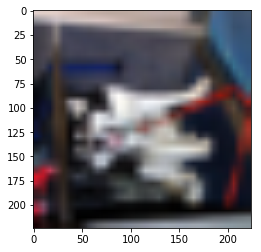

In [84]:
Train_data, Test_data = Net_Train.loadTrainTestData(Data, 8, Train_ratio=0.5, resize=224)

In [85]:
print(Train_data.shape, Test_data.shape)

(16, 8, 150529) (128, 150529)


In [93]:
from mxnet.gluon.model_zoo import vision
from mxnet import gluon
from mxnet import init
import mxnet
AlexNet = vision.AlexNet(classes=122)
AlexNet.initialize(init=init.Xavier())

loss = gluon.loss.SoftmaxCrossEntropyLoss()
Trainer = gluon.Trainer(AlexNet.collect_params(), 'sgd', {'learning_rate': 0.1})

In [94]:
Net_Train.train(Train_data, Test_data, AlexNet, 10, loss, Trainer, 224, ctx=mxnet.cpu())

Echoe is 1, Train Loss is 4.811246, Train Acc is 0.000000, Test Acc is 0.015625, Use-time is 30.634849 S
Echoe is 2, Train Loss is 4.703394, Train Acc is 0.015625, Test Acc is 0.015625, Use-time is 28.194997 S


KeyboardInterrupt: 